In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Income dataset

In [4]:
income = np.loadtxt('data/income.csv',
                    converters = {0: lambda x: float(x)},
                    skiprows = 1,
                    usecols = [1,2],
                    delimiter = ',',
                    encoding = 'utf-8')

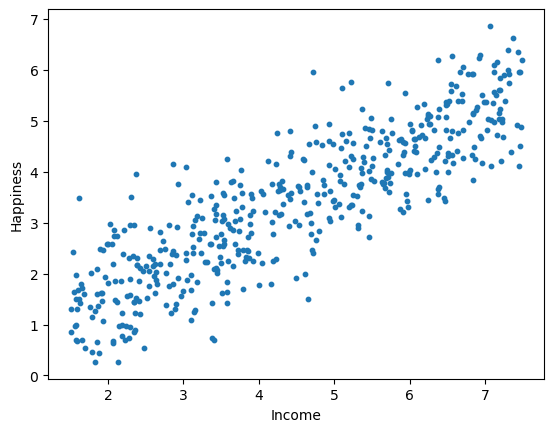

In [5]:
f ,ax = plt.subplots()
ax.scatter(income[:,0],income[:,1], s= 10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

## Ordenada = 0

In [ ]:
x,y = income[:,0], income[:,1]

In [ ]:
x.shape, y.shape

In [ ]:
x = x.reshape((498,1))
y = y.reshape((498,1))

In [ ]:
b = np.dot(np.dot(x.T,x)**(-1), np.dot(x.T,y))

In [ ]:
b.shape

In [ ]:
xspace = np.linspace(0,8,240)
y_hat =  (xspace * b).reshape((240,1))

In [ ]:
y_hat.shape, xspace.shape

In [ ]:
f, ax = plt.subplots()
ax.scatter(income[:,0],income[:,1],s=10)
ax.plot(xspace,y_hat, color='red')

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

$y = b x$

In [ ]:
b

In [ ]:
lr_income = LinearRegression(fit_intercept=False)

In [ ]:
lr_income.fit(x,y)

In [ ]:
lr_income.coef_

In [ ]:
lr_income.score(x,y)

## Ordenada $\neq$ 0

In [ ]:
# Subimos los datos 3 unidades
y2 = y + 3

In [ ]:
f ,ax = plt.subplots()
ax.scatter(x,y2, s=10)
ax.set_ylim(0,10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

In [ ]:
lr_inc2 = LinearRegression(fit_intercept=True)

In [ ]:
lr_inc2.fit(x,y2)

In [ ]:
lr_inc2.coef_

In [ ]:
lr_inc2.intercept_

In [ ]:
yhat2 = lr_inc2.predict(xspace.reshape(240,1))

In [ ]:
f ,ax = plt.subplots()
ax.scatter(x,y2,s=10)
ax.plot(xspace,yhat2, color='red')
ax.plot(xspace,y_hat, color='green')
ax.plot(xspace,np.mean(y2)*np.ones(xspace.shape[0]), color='orange')

ax.set_ylim(0,10)

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

**Coeficiente de determinación $R^2$**

In [ ]:
lr_income.score(x,y)

In [ ]:
lr_inc2.score(x,y)

In [ ]:
lr_inc2.score(x,y2)

# Possum

<img src='data/dataset-cover.jpg'>

In [ ]:
df = pd.read_csv('data/possum.csv')

In [ ]:
df.head()

Para este ejemplo, solo conservaremos variables numéricas y el indicador de sexo.

In [ ]:
df = df.loc[:,'sex':]

In [ ]:
df.head()

# Preprocessing

## Missing

In [ ]:
df.isna().sum()

In [ ]:
len(df)

In [ ]:
# Se eliminan 3 filas con Nan
df = df[df.isna().sum(axis=1) == 0]

In [ ]:
len(df)

In [ ]:
df.isna().sum()

# One hot encoding

In [ ]:
df.describe(include='O')

In [ ]:
## Utilizando get_dummies de pandas, podemos obtener lo que se llama
## k-1 one hot encoding. Lo veremos en detalle en Análisis de datos!!
df1 = pd.get_dummies(data=df, columns = ['sex'], drop_first=True)

In [ ]:
df1

In [ ]:
columnas = [col for col in df1.columns if ((col != 'sex_m') & (col != 'totlngth'))]

In [ ]:
columnas

In [ ]:
sns.pairplot(df1, hue='sex_m',x_vars=columnas,y_vars='totlngth')
plt.show()

In [ ]:
for columna in columnas:
    sns.relplot(x=columna,y='totlngth',hue='sex_m', data=df1)

## Standardize

In [ ]:
x = df1[[col for col in df1.columns if col != 'totlngth']]

In [ ]:
y = df1['totlngth']

### Train test split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.25,
                                             random_state=12,
                                             stratify = x.sex_m
                                             )

In [ ]:
std = StandardScaler()

In [ ]:
xtrain[columnas] = std.fit_transform(xtrain[columnas])
xtest[columnas] = std.transform(xtest[columnas])

In [ ]:
xtrain

# Regresión lineal

## Con ordenada

In [ ]:
lr = LinearRegression(fit_intercept=True)

In [ ]:
lr.fit(xtrain[columnas],ytrain)

In [ ]:
lr.coef_

In [ ]:
lr.score(xtrain[columnas],ytrain)

In [ ]:
lr.score(xtest[columnas],ytest)

In [ ]:
lr.intercept_

## Sin ordenada

In [ ]:
lr_sin = LinearRegression(fit_intercept=False)

In [ ]:
lr_sin.fit(xtrain[columnas],ytrain)

In [ ]:
lr_sin.coef_

In [ ]:
lr_sin.intercept_

In [ ]:
lr_sin.score(xtrain[columnas],ytrain)

In [ ]:
lr_sin.score(xtest[columnas],ytest)

In [ ]:
lr_sin.coef_

Esto quiere decir que esta regresion podemos escribirla como:

\begin{equation}

    \begin{array}{rcl}
        \text{Total Length} &=& -0.128 \cdot \text{age} +
                                1.701 \cdot \text{hdlngth} -
                                0.099 \cdot \text{skullw} +
                                2.116 \cdot \text{taill} + \\
                            & & 0.843 \cdot \text{footlgth} +
                                0.624 \cdot \text{earconch} +
                                0.093 \cdot \text{eye} +
                                0.300 \cdot \text{chest} + \\
                            & & 0.135 \cdot \text{belly}
    \end{array}
\end{equation}